## Observations and Insights

1. The distribution between male and female mice are evenly distributed.
2. Infubinol is the only drug regimen of the four most promising treatments that has outliers.
3. Mouse weight and tumor volume have a strong positive correlation.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='left')
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = data_df.groupby('Drug Regimen')
stats = grouped_data['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

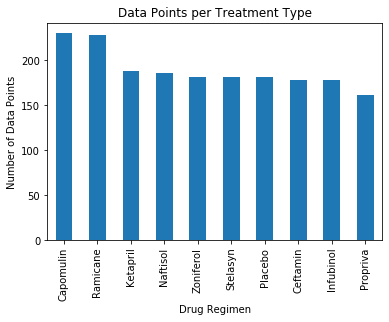

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
countdf = data_df['Drug Regimen'].value_counts().to_frame()

countdf.plot.bar(legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Data Points per Treatment Type')
plt.show()

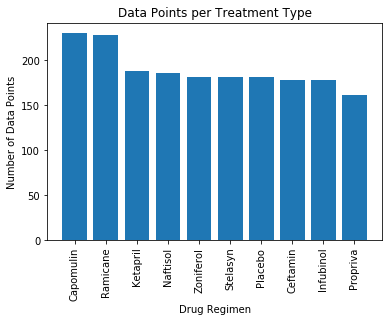

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(countdf.index.values,countdf['Drug Regimen'])
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation='vertical')
plt.title('Data Points per Treatment Type')
plt.show()

## Pie plots

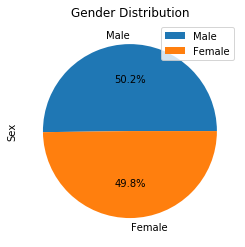

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_df = data_df.drop_duplicates('Mouse ID')
pie_df = pie_df['Sex'].value_counts().to_frame()

pie_df.plot.pie(y='Sex',autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

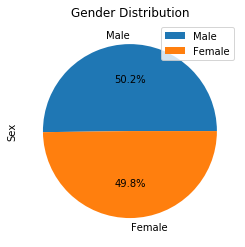

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_df['Sex'],labels=pie_df.index.values,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.legend()
plt.title('Gender Distribution')
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
filter_df = data_df.loc[data_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin']),:]

sorted_df = filter_df.sort_values(by='Timepoint',ascending=False)
grouped_df = sorted_df.groupby("Mouse ID").first()
print(grouped_df[['Tumor Volume (mm3)','Drug Regimen']])

#Calculate Capomulin
capo_df = grouped_df.loc[grouped_df["Drug Regimen"]=="Capomulin","Tumor Volume (mm3)"]
quartiles=capo_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outlier_count = 0
for mouse in capo_df:
    if mouse > upper_bound or mouse < lower_bound:
        outlier_count += 1    
print(f"Capomulin has {outlier_count} outliers.")

#Calculate Ramicane
rami_df = grouped_df.loc[grouped_df["Drug Regimen"]=="Ramicane","Tumor Volume (mm3)"]
quartiles=rami_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outlier_count = 0
for mouse in rami_df:
    if mouse > upper_bound or mouse < lower_bound:
        outlier_count += 1    
print(f"Ramicane has {outlier_count} outliers.")

#Calculate Infubinol
infu_df = grouped_df.loc[grouped_df["Drug Regimen"]=="Infubinol","Tumor Volume (mm3)"]
quartiles=infu_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outlier_count = 0
for mouse in infu_df:
    if mouse > upper_bound or mouse < lower_bound:
        outlier_count += 1    
print(f"Infubinol has {outlier_count} outliers.")

#Calculate Ceftamin
ceft_df = grouped_df.loc[grouped_df["Drug Regimen"]=="Ceftamin","Tumor Volume (mm3)"]
quartiles=ceft_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outlier_count = 0
for mouse in ceft_df:
    if mouse > upper_bound or mouse < lower_bound:
        outlier_count += 1    
print(f"Ceftamin has {outlier_count} outliers.")

          Tumor Volume (mm3) Drug Regimen
Mouse ID                                 
a203               67.973419    Infubinol
a251               65.525743    Infubinol
a275               62.999356     Ceftamin
a411               38.407618     Ramicane
a444               43.047543     Ramicane
...                      ...          ...
y769               68.594745     Ceftamin
y793               31.896238    Capomulin
y865               64.729837     Ceftamin
z578               30.638696     Ramicane
z581               62.754451    Infubinol

[100 rows x 2 columns]
Capomulin has 0 outliers.
Ramicane has 0 outliers.
Infubinol has 1 outliers.
Ceftamin has 0 outliers.


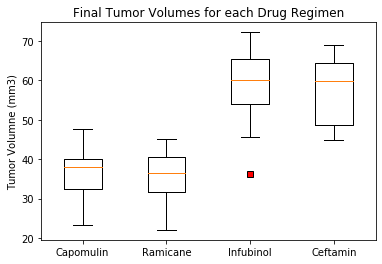

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = {'Capomulin':capo_df,
       'Ramicane':rami_df,
       'Infubinol':infu_df,
       'Ceftamin':ceft_df}

fig, ax = plt.subplots()
ax.set_title('Final Tumor Volumes for each Drug Regimen')
ax.set_ylabel('Tumor Volumne (mm3)')
ax.boxplot(data.values(),flierprops={'markerfacecolor':'r','marker':'s'})
ax.set_xticklabels(data.keys())
plt.show()

## Line and scatter plots

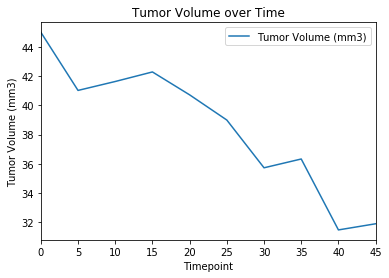

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#mouse = y793
mouse_filter = data_df.loc[data_df['Mouse ID']=='y793',['Tumor Volume (mm3)','Timepoint']]
mouse_filter = mouse_filter.set_index(['Timepoint'])
# plt.plot(mouse_filter['Timepoint'],mouse_filter['Tumor Volume (mm3)'])
mouse_filter.plot()
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume over Time')
plt.show()

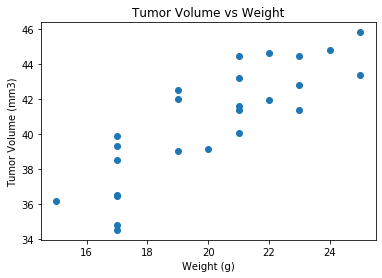

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_filter = data_df.loc[data_df['Drug Regimen']=='Capomulin',['Tumor Volume (mm3)','Weight (g)', 'Mouse ID']]
weight_group = capo_filter.groupby('Mouse ID').mean()

weight_group
# weight_group.plot.scatter(x=weight_group.index.values.tolist(),y=weight_group['Tumor Volume (mm3)'])
#weight_group.index.values
plt.scatter(x=weight_group['Weight (g)'],y=weight_group['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight')
plt.show()

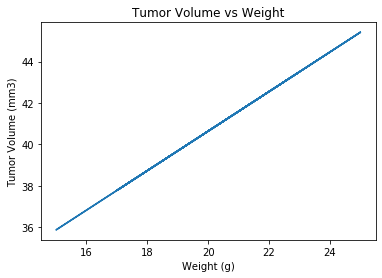

The correlation coefficient is 0.8419363424694718.


In [13]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, rvalue, pvalue, sem = st.linregress(x=weight_group['Weight (g)'],y=weight_group['Tumor Volume (mm3)'])
#plt.scatter(x=weight_group['Weight (g)'],y=weight_group['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight')
plt.plot(weight_group['Weight (g)'], slope*weight_group['Weight (g)']+intercept)
plt.show()

print(f'The correlation coefficient is {rvalue}.')